Selección del Conjunto de Datos:
Escoge un conjunto de datos simple (no se debe usar el conjunto de datos iris pero si una similar) para realizar la práctica. Esta base debe ser del siguiente enlace (3 puntos):
CONJUNTO DE DATOS DE MENOS DE 100 INSTANCIAS: LINK DE BASES DE DATOS A USARLinks to an external site.

In [3]:
import pandas as pd
#display
from IPython.display import display

# Load data
file_path = '/workspaces/pc_final_sistemas_inteligentes/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)
display(data)



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Aplicación del Método K-means:

1. Utilizar el algoritmo K-means en el conjunto de datos seleccionado.Utiliza el archivo usado en los ejercicios kmeans_clustering.py como referencia (3 puntos).
2. Define el número de clusters K de acuerdo con las características del conjunto de datos. Justifica tu elección (3 puntos).
3. Realiza una visualización de los clusters obtenidos. Utiliza gráficos de dispersión para mostrar la distribución de los datos en los diferentes clusters (2 puntos).

Cargando datos...


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Determinando cantidad de clusters con el metodo de la silueta...
For n_clusters = 2, the average silhouette_score is : 0.5828885059197845
For n_clusters = 3, the average silhouette_score is : 0.5385339143902981
For n_clusters = 4, the average silhouette_score is : 0.5510889729957427
For n_clusters = 5, the average silhouette_score is : 0.55278510384681
For n_clusters = 6, the average silhouette_score is : 0.553029506987534
For n_clusters = 7, the average silhouette_score is : 0.5738789440302335
For n_clusters = 8, the average silhouette_score is : 0.5943601660361522
For n_clusters = 9, the average silhouette_score is : 0.5950885139366894
For n_clusters = 10, the average silhouette_score is : 0.5923910310401745


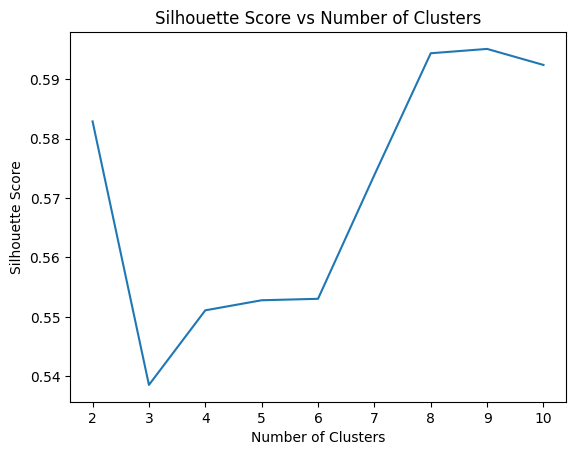

Aplicando metodo del codo...


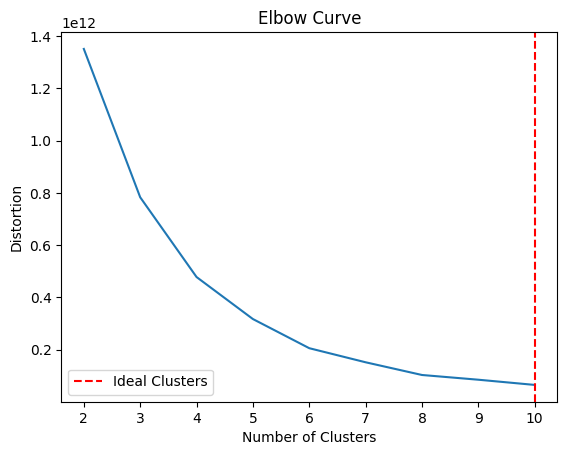

In [15]:
import pandas as pd
from IPython.display import display
# bibliotecas para aplicar k means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    display(data)
    return data

def silhouette_metod (data):
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    import numpy as np

    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}')

    plt.plot(range_n_clusters, silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()

def metodo_codo (data):
        range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        distortions = []
        for n_clusters in range_n_clusters:
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
            clusterer.fit(data)
            distortions.append(clusterer.inertia_)

        # Plot the Elbow Curve
        plt.plot(range_n_clusters, distortions)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Distortion')
        n_clusters = distortions.index(min(distortions)) + 2
        plt.axvline(x=n_clusters, color='r', linestyle='--', label='Ideal Clusters')
        plt.legend()
        plt.title('Elbow Curve')

def k_means (data, n_clusters):
        scaler = StandardScaler()
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        pipeline = make_pipeline(scaler, kmeans)
        pipeline.fit(data)
        labels = pipeline.predict(data)
        return labels


# main desde donde se llama a las funciones

if __name__ == '__main__':
    
    print('Cargando datos...')
    file_path = '/workspaces/pc_final_sistemas_inteligentes/heart_failure_clinical_records_dataset.csv'
    load_data(file_path)

    print('Determinando cantidad de clusters con el metodo de la silueta...')
    silhouette_metod(data)

    print('Aplicando metodo del codo...')
    metodo_codo(data)


